## Bring in libraries and dataframes and set indexes

In [2]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ETFunctions
%matplotlib inline
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import statsmodels.api as sm
import matplotlib.dates as mdates
import GraphHelpers as GH

C:\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
WaterDelta = pd.read_pickle('.\DataFrames\ProfileWaterDelta.pkl')
WaterDelta.columns = WaterDelta.columns.swaplevel('Irrigation','Cultivar')
GH.SortFrame(WaterDelta)

In [4]:
WaterDelta.columns

MultiIndex([( 'Dash', 'High', '1'),
            ( 'Dash', 'High', '2'),
            ( 'Dash', 'High', '3'),
            ( 'Dash', 'High', '4'),
            ( 'Dash',  'Low', '1'),
            ( 'Dash',  'Low', '2'),
            ( 'Dash',  'Low', '3'),
            ( 'Dash',  'Low', '4'),
            ( 'Dash',  'Mid', '1'),
            ( 'Dash',  'Mid', '2'),
            ( 'Dash',  'Mid', '3'),
            ( 'Dash',  'Mid', '4'),
            ('Omaka', 'High', '1'),
            ('Omaka', 'High', '2'),
            ('Omaka', 'High', '3'),
            ('Omaka', 'High', '4'),
            ('Omaka',  'Low', '1'),
            ('Omaka',  'Low', '2'),
            ('Omaka',  'Low', '3'),
            ('Omaka',  'Low', '4'),
            ('Omaka',  'Mid', '1'),
            ('Omaka',  'Mid', '2'),
            ('Omaka',  'Mid', '3'),
            ('Omaka',  'Mid', '4')],
           names=['Cultivar', 'Irrigation', 'Block'])

In [5]:
GPs = GH.SetGraphicsPatterns(WaterDelta.columns,
                    ['--','-'],
                    [0.45,0.15],
                    ['^','o'],
                    ['blue','red','green'])

Cultivar
['Dash', 'Omaka']
Irrigation
['High', 'Low', 'Mid']
Treatments
MultiIndex([( 'Dash', 'High'),
            ( 'Dash',  'Low'),
            ( 'Dash',  'Mid'),
            ('Omaka', 'High'),
            ('Omaka',  'Low'),
            ('Omaka',  'Mid')],
           )
Styles
[('--', 'blue', 0.45, '^'), ('--', 'red', 0.45, '^'), ('--', 'green', 0.45, '^'), ('-', 'blue', 0.15, 'o'), ('-', 'red', 0.15, 'o'), ('-', 'green', 0.15, 'o')]
StyleFrame
           Lin    Col   Alp Mar    MFC
Dash  High  --   blue  0.45   ^   blue
      Low   --    red  0.45   ^    red
      Mid   --  green  0.45   ^  green
Omaka High   -   blue  0.15   o  white
      Low    -    red  0.15   o  white
      Mid    -  green  0.15   o  white


## investigate how much upward flux we are getting at night

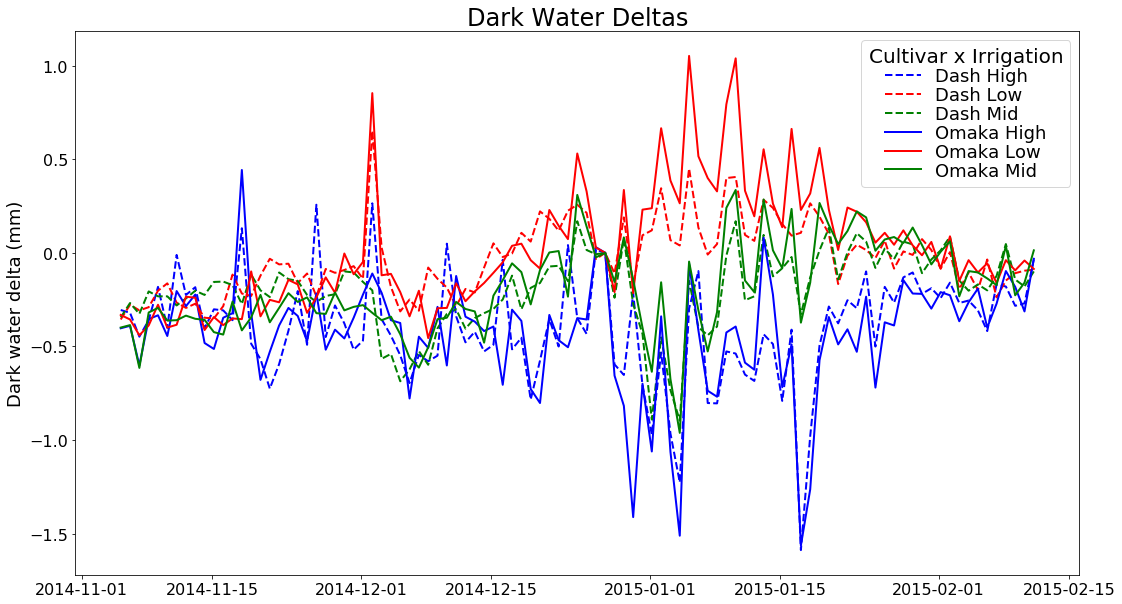

In [6]:
DarkWaterDeltas = WaterDelta.iloc[WaterDelta.index.indexer_between_time(datetime.time(23),datetime.time(5))]
DarkWaterDeltas = DarkWaterDeltas.resample('24H', base=5).sum()#Base of 5 means sampling from 6am to 6am
MeanDarkWaterDeltas = DarkWaterDeltas.groupby(level=['Cultivar','Irrigation'],axis=1).mean()
Graph = plt.figure(figsize=(18,10))
ax = Graph.add_subplot(1,1,1)
GH.AddIndexedPlot(MeanDarkWaterDeltas,ax,GPs,2)
GH.AddLegend(1,18,"Cultivar x Irrigation")
GH.SetAxProps(title='Dark Water Deltas',titsize=24,
              ylab='Dark water delta (mm)',labsize = 18,
              ticsize = 16)

(-2, 0.4)

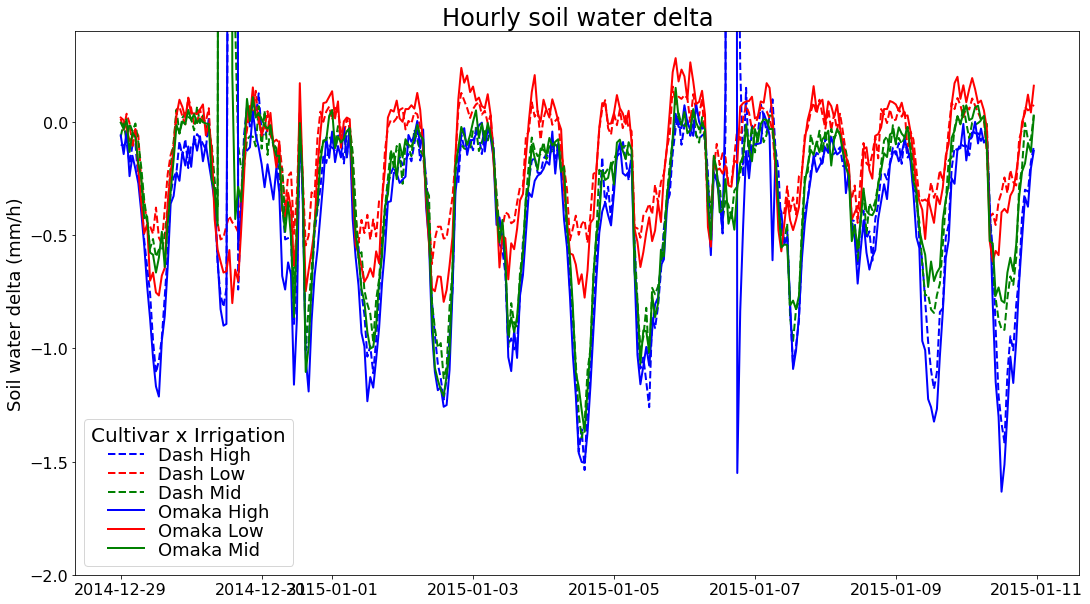

In [7]:
WaterDeltaHourly = WaterDelta.resample('h').sum()
MeanWaterDeltaHourly = WaterDeltaHourly.groupby(level=['Cultivar','Irrigation'],axis=1).mean()
SEMWaterDeltaHourly = WaterDeltaHourly.groupby(level=['Cultivar','Irrigation'],axis=1).std()/np.sqrt(4)
Graph = plt.figure(figsize=(18,10))
ax = Graph.add_subplot(1,1,1)
GH.AddIndexedPlot(MeanWaterDeltaHourly.loc['2014-12-29':'2015-01-10'],ax,GPs,2)
GH.AddLegend(3,18,"Cultivar x Irrigation")
GH.SetAxProps(title='Hourly soil water delta',titsize=24,
              ylab='Soil water delta (mm/h)',labsize = 18,
              ticsize = 16)
plt.ylim(-2,0.4)

## Work out Irrigation timings and amounts.

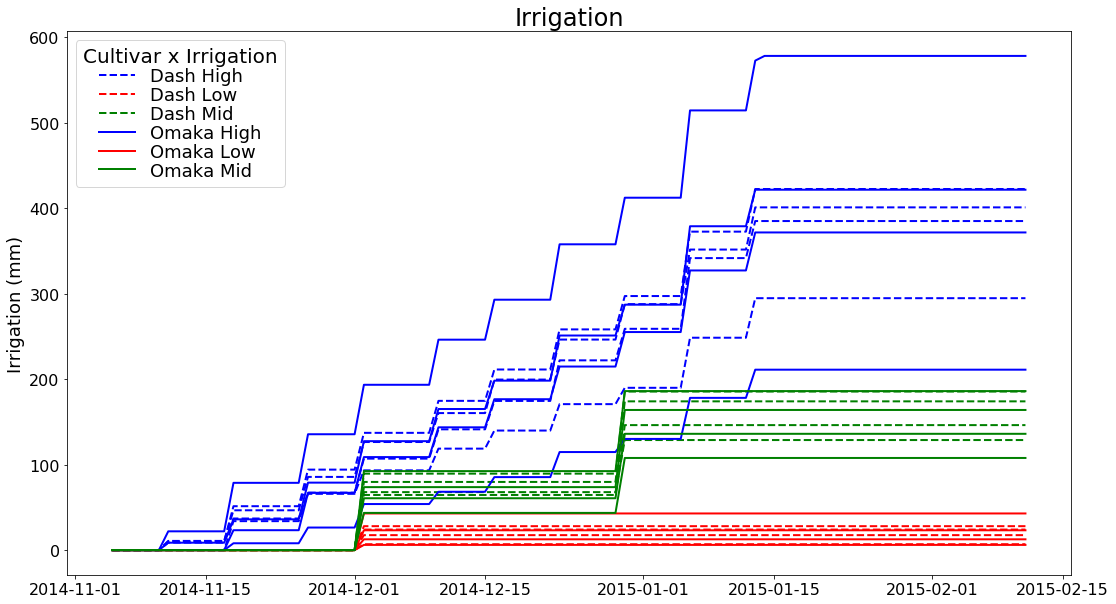

In [8]:
Irrigation = WaterDelta.where(WaterDelta > 3)
Irrigation = Irrigation.resample('D').sum()
Irrigation.fillna(0, inplace = True)
AccumIrrig = Irrigation.cumsum()
#AccumIrrig.plot( figsize=(18,10), style=['b-','b-','b-','b-','b--','b--','b--','b--','r-','r-','r-','r-','r--','r--','r--','r--','g-','g-','g-','g-','g--','g--','g--','g--'])
Graph = plt.figure(figsize=(18,10))
ax = Graph.add_subplot(1,1,1)
GH.AddIndexedPlot(AccumIrrig,ax,GPs,2)
GH.AddLegend(2,18,"Cultivar x Irrigation")
GH.SetAxProps(title='Irrigation',titsize=24,
              ylab='Irrigation (mm)',labsize = 18,
              ticsize = 16)

In [9]:
Irrigation.to_pickle('.\DataFrames\Irrigation.pkl')

In [10]:
HighIrrigIndex = Irrigation.where(Irrigation > 0).dropna(how='all').index.tolist()
del HighIrrigIndex[-1:]

In [11]:
LowIrrIndex = pd.to_datetime('2014-12-02 00:00:00')
MidIrrIndex = pd.to_datetime(['2014-12-02 00:00:00','2014-12-23 00:00:00'])
HighIrrigIndex = pd.to_datetime(['2014-11-11 00:00:00',
 '2014-11-18 00:00:00',
 '2014-11-26 00:00:00',
 '2014-12-02 00:00:00',
 '2014-12-10 00:00:00',
 '2014-12-16 00:00:00',
 '2014-12-23 00:00:00',
 '2014-12-30 00:00:00',
 '2015-01-06 00:00:00',
 '2015-01-14 00:00:00'])

In [12]:
DSIyesterday = 0

DaysSinceIrrigation = pd.DataFrame(index = Irrigation.index, columns = Irrigation.columns)
for col in range(DaysSinceIrrigation.columns.size):
    for x in range(Irrigation.index.size):
        if x == 0:
            DaysSinceIrrigation.iloc[x,col] = float(0)
        else: 
            if Irrigation.iloc[x,col] == 0:
                DaysSinceIrrigation.iloc[x,col] = float(DaysSinceIrrigation.iloc[x-1,col]+1)
            else:
                DaysSinceIrrigation.iloc[x,col] = float(0)

## Whats causing the big negatives in the irrigated treatments, is it drainage following irrigation or dark water extraction following high ET day or night time transpiration??

### Bring in some variables that may explain it

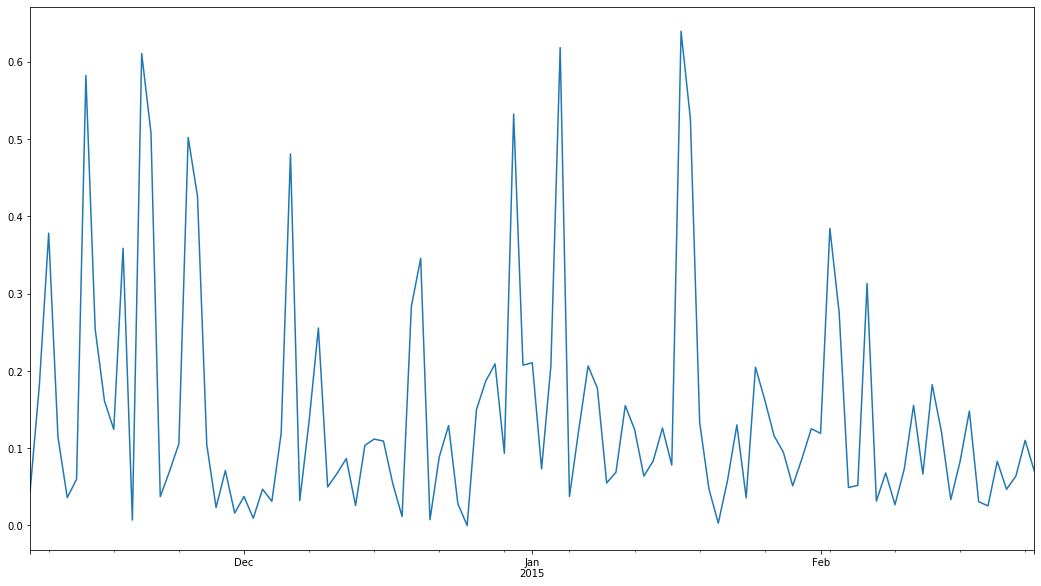

In [13]:
#Bring in night time PET data
NightTimePETAtmospheric = pd.read_pickle('.\DataFrames/NightTimePET.pkl')
NightTimePETAtmospheric.index = NightTimePETAtmospheric.index.normalize()
NightTimePETAtmospheric = NightTimePETAtmospheric.loc['2014-11-08':] #Drop of the first day because it only has a part nights numbers and no day associated wit it
NightTimePETAtmospheric.plot(figsize=(18,10))

In [14]:
NightTimeSoilHeatFlux = pd.read_pickle('.\DataFrames\SoilHeatFluxNightEst.pkl')
NightTimeSoilHeatFlux_mm = np.divide(NightTimeSoilHeatFlux,2.4)

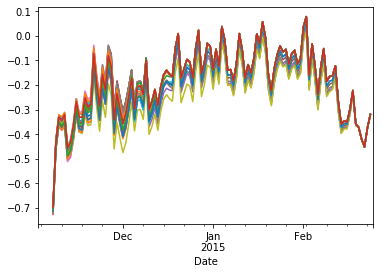

In [15]:
NightTimeSoilHeatFlux_mm.plot(legend=False)

In [16]:
DayTimePET = pd.read_pickle('.\DataFrames\DayTimePET.pkl')
DayTimePET.index = DayTimePET.index.normalize()

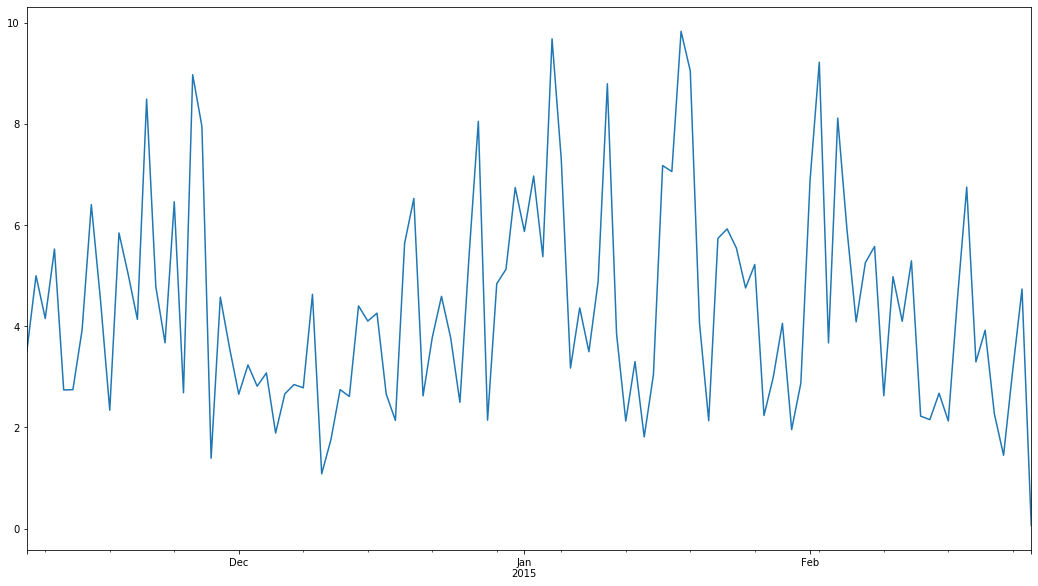

In [17]:
DayTimePET.plot(figsize=(18,10))

## Stick the Dark water delta into a data frame with the things that might explain it and do a multiple regression

In [18]:
SWD = pd.read_pickle('.\DataFrames\DailySWD.pkl')

In [19]:
Cultivars = ['Dash','Omaka']
Irrigations = ['Low', 'Mid','High']

LongData = MeanDarkWaterDeltas.loc['2014-11-08':,:]
LongData.index = LongData.index.normalize()
LongData = LongData.unstack()
LongData = pd.DataFrame(LongData, columns=['DarkDeltas'])
#multiply Gnight by -1 to make positive (potential evaporation as apposed to negative heat gain)
LongData.loc[:,'Gnight'] = NightTimeSoilHeatFlux_mm.loc['2014-11-08':'2015-02-11',:].groupby(level=('Cultivar','Irrigation'),axis=1).mean().unstack().multiply(-1)
LongData.loc[:,'SWD'] = SWD.loc['2014-11-08':'2015-02-11',:].groupby(level=('Cultivar','Irrigation'),axis=1).mean().unstack()
for Cult in Cultivars:
    for Irr in Irrigations:
        LongData.loc[(Cult,Irr),'PETAtmoNight'] = NightTimePETAtmospheric.loc['2014-11-08':'2015-02-11'].values
        LongData.loc[(Cult,Irr),'PETAtmoDay'] = DayTimePET.loc['2014-11-08':'2015-02-11'].values
        LongData.loc[(Cult,Irr),'DSI'] = DaysSinceIrrigation.loc['2014-11-08':'2015-02-11',(Cult,Irr)].mean(axis=1).values
LongData.loc[:,'PETnight'] = LongData.loc[:,'Gnight']+LongData.loc[:,'PETAtmoNight']
LongData.loc[:,'IntSWD_PETnight'] = LongData.loc[:,'SWD']*LongData.loc[:,'PETnight']
LongData.loc[:,'IntSWD_Gnight'] = LongData.loc[:,'SWD']*LongData.loc[:,'Gnight']
LongData.loc[:,'IntSWD_PETAtmoNight'] = LongData.loc[:,'SWD']*LongData.loc[:,'PETAtmoNight']
LongData.loc[:,'IntSWD_PETDay'] = LongData.loc[:,'SWD']*LongData.loc[:,'PETAtmoDay']

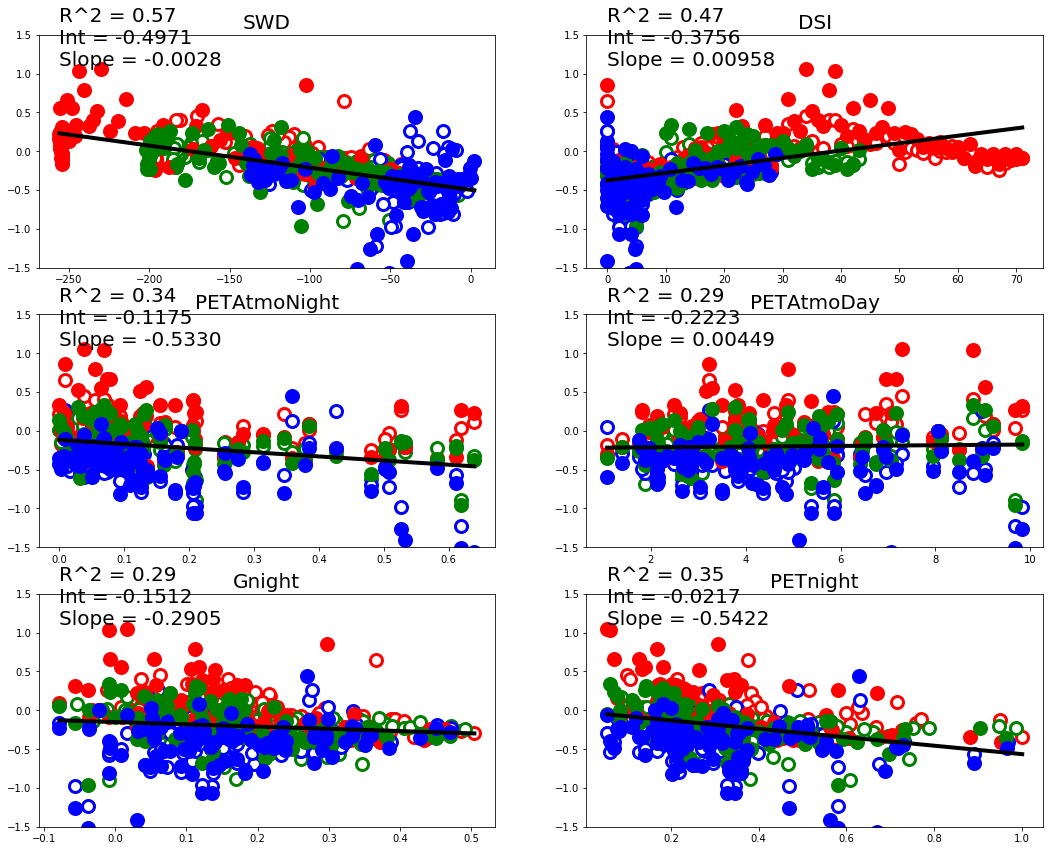

<Figure size 1296x720 with 0 Axes>

In [20]:
Graph = plt.figure(figsize=(18,30))
plt.figure(figsize=(18,10))
ecols = ['r','g','b','r','g','b']
fcols = ['w','w','w','r','g','b']
pannel = 1
Descriptors = [ 'SWD', 'DSI', 'PETAtmoNight','PETAtmoDay','Gnight','PETnight']
for des in Descriptors:
    DailyDescriptor = LongData.loc[:,des]
    fig = Graph.add_subplot(6,2,pannel)
    pos = 0
    for cul in Cultivars:
        for irr in Irrigations:
            fig.plot(LongData.loc[(cul,irr),des].loc['2014-11-08':],
                LongData.loc[(cul,irr),'DarkDeltas'].loc['2014-11-08':],
                     'o',mec=ecols[pos],mfc=fcols[pos],mew = 3, markersize = 12,)
            pos+=1  
    
    X = LongData.loc[:,LongData.columns.isin([des])]
    Y = LongData.loc[:,'DarkDeltas']
    ModTemp = sm.regression.linear_model.OLS(Y,  # Y variable
                                            sm.add_constant(X), # X variable
                                            missing='drop',                                     # ignor and data where one value is missing
                                            hasconst=False) 
    Regres = ModTemp.fit(); 
    Xs = []
    Xs.append(X.min())
    Xs.append(X.max())
    Ys = []
    Ys.append(Regres.params[0] + Xs[0]*Regres.params[1])
    Ys.append(Regres.params[0] + Xs[1]*Regres.params[1])
    fig.plot(Xs,Ys,'-', linewidth = 4, color='k')
    fitR2 = 'R^2 = ' + str(Regres.rsquared)[:4] + '\nInt = ' + str(Regres.params[0])[:7] + '\nSlope = ' + str(Regres.params[1])[:7]
    fig.text(X.min(),1.1,fitR2,fontsize=20)
    fig.set_ylim(-1.5,1.5)
    fig.set_title(des, fontsize = 20)
    pannel +=1

In [21]:
Descriptors = ['SWD']
X = LongData.loc[:,LongData.columns.isin(Descriptors)]
Y = LongData.loc[:,'DarkDeltas']
ModTemp = sm.regression.linear_model.OLS(Y,  # Y variable
                                        sm.add_constant(X), # X variable
                                        missing='drop',                                     # ignor and data where one value is missing
                                        hasconst=False) 
Regres = ModTemp.fit(); 
Regres.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             DarkDeltas   R-squared (uncentered):                   0.576
Model:                            OLS   Adj. R-squared (uncentered):              0.575
Method:                 Least Squares   F-statistic:                              386.2
Date:                Tue, 25 Aug 2020   Prob (F-statistic):                   1.24e-106
Time:                        11:20:29   Log-Likelihood:                         -7.3394
No. Observations:                 570   AIC:                                      18.68
Df Residuals:                     568   BIC:                                      27.37
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4972      0.018    -27.264      0.000      -0.533      -0.461
SWD           -0.0028      0.000    -19.472      0.000      -0.003      -0.003
==============================================================================
Omnibus:                       94.695   Durbin-Watson:                   1.158
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              632.105
Skew:                          -0.523   Prob(JB):                    5.50e-138
Kurtosis:                       8.052   Cond. No.                         221.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
Descriptors = ['SWD','PETAtmoday']
X = LongData.loc[:,LongData.columns.isin(Descriptors)]
Y = LongData.loc[:,'DarkDeltas']
ModTemp = sm.regression.linear_model.OLS(Y,  # Y variable
                                        sm.add_constant(X), # X variable
                                        missing='drop',                                     # ignor and data where one value is missing
                                        hasconst=False) 
Regres = ModTemp.fit(); 
Regres.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             DarkDeltas   R-squared (uncentered):                   0.576
Model:                            OLS   Adj. R-squared (uncentered):              0.575
Method:                 Least Squares   F-statistic:                              386.2
Date:                Tue, 25 Aug 2020   Prob (F-statistic):                   1.24e-106
Time:                        11:20:29   Log-Likelihood:                         -7.3394
No. Observations:                 570   AIC:                                      18.68
Df Residuals:                     568   BIC:                                      27.37
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4972      0.018    -27.264      0.000      -0.533      -0.461
SWD           -0.0028      0.000    -19.472      0.000      -0.003      -0.003
==============================================================================
Omnibus:                       94.695   Durbin-Watson:                   1.158
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              632.105
Skew:                          -0.523   Prob(JB):                    5.50e-138
Kurtosis:                       8.052   Cond. No.                         221.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Some things are clear from first glance.  SWD is having a strong influence on dark water deltas.  this makes sense because when the soil is wet there will be flux below out of the bottom and when it is dry there into the bottom of the profile.  So a large part of the dark water deltas can be attributed to unsaturated fluxes over the bottom of the profile.  Assumably these will be the same at day as they are at night and need to be accounted for in the water balance.
### There is a relationship between SWD and DSI.  Lets investigate that further

Text(0, 0.5, 'DSI (d)')

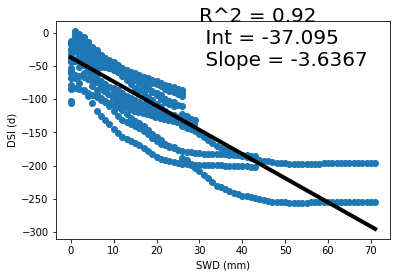

In [23]:
X = LongData.loc[:,'DSI'].loc['2014-11-08':]
Y = LongData.loc[:,'SWD'].loc['2014-11-08':]
plt.plot(X,Y,'o')

ModTemp = sm.regression.linear_model.OLS(Y,  # Y variable
                                        sm.add_constant(X), # X variable
                                        missing='drop',                                     # ignor and data where one value is missing
                                        hasconst=False) 
Regres = ModTemp.fit(); 
Xs = []
Xs.append(X.min())
Xs.append(X.max())
Ys = []
Ys.append(Regres.params[0] + Xs[0]*Regres.params[1])
Ys.append(Regres.params[0] + Xs[1]*Regres.params[1])
plt.plot(Xs,Ys,'-', linewidth = 4, color='k')
fitR2 = 'R^2 = ' + str(Regres.rsquared)[:4] + '\n Int = ' + str(Regres.params[0])[:7] + '\n Slope = ' + str(Regres.params[1])[:7]
plt.text(30,-50,fitR2,fontsize=20)
plt.xlabel('SWD (mm)')
plt.ylabel('DSI (d)')

## SWD and DSI are highly correlated so it is the SWD that is causing the relationship between DSI and dark water deltas.  Some non-linearity between dark water deltas and DSI would indicate saturated drainage, dropping away soon after irrigation but this was not apparent so we can not attribute any of the dark water deltas to drainage. 

## There were also positive effects from darkPETatmo and Gdark (and the sum of these, PETnight).  Lets take a closer look at them

In [24]:
#Calculate residuals from SWD relationship and look at how well other things explain
LongData.loc[:,'EstDarkDeltas'] = -0.427 + LongData.loc[:,'SWD'] * -0.0024
LongData.loc[:,'ResDarkDeltas'] = LongData.loc[:,'DarkDeltas'] - LongData.loc[:,'EstDarkDeltas']

Text(0, 0.5, 'Gnight (mm)')

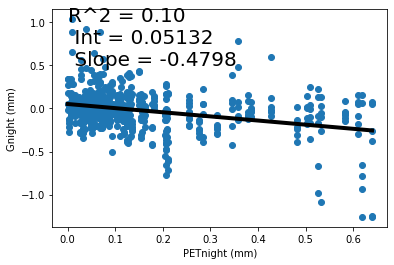

In [25]:
X = LongData.loc[:,'PETAtmoNight'].loc['2014-11-08':]
Y = LongData.loc[:,'ResDarkDeltas'].loc['2014-11-08':]
plt.plot(X,Y,'o')

ModTemp = sm.regression.linear_model.OLS(Y,  # Y variable
                                        sm.add_constant(X), # X variable
                                        missing='drop',                                     # ignor and data where one value is missing
                                        hasconst=False) 
Regres = ModTemp.fit(); 
Xs = []
Xs.append(X.min())
Xs.append(X.max())
Ys = []
Ys.append(Regres.params[0] + Xs[0]*Regres.params[1])
Ys.append(Regres.params[0] + Xs[1]*Regres.params[1])
plt.plot(Xs,Ys,'-', linewidth = 4, color='k')
fitR2 = 'R^2 = ' + str(Regres.rsquared)[:4] + '\n Int = ' + str(Regres.params[0])[:7] + '\n Slope = ' + str(Regres.params[1])[:7]
plt.text(X.min(),0.5,fitR2,fontsize=20)
plt.xlabel('PETnight (mm)')
plt.ylabel('Gnight (mm)')

Text(0, 0.5, 'Gnight (mm)')

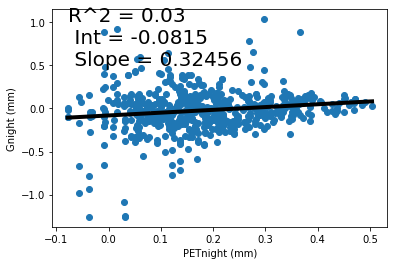

In [26]:
X = LongData.loc[:,'Gnight'].loc['2014-11-08':]
Y = LongData.loc[:,'ResDarkDeltas'].loc['2014-11-08':]
plt.plot(X,Y,'o')

ModTemp = sm.regression.linear_model.OLS(Y,  # Y variable
                                        sm.add_constant(X), # X variable
                                        missing='drop',                                     # ignor and data where one value is missing
                                        hasconst=False) 
Regres = ModTemp.fit(); 
Xs = []
Xs.append(X.min())
Xs.append(X.max())
Ys = []
Ys.append(Regres.params[0] + Xs[0]*Regres.params[1])
Ys.append(Regres.params[0] + Xs[1]*Regres.params[1])
plt.plot(Xs,Ys,'-', linewidth = 4, color='k')
fitR2 = 'R^2 = ' + str(Regres.rsquared)[:4] + '\n Int = ' + str(Regres.params[0])[:7] + '\n Slope = ' + str(Regres.params[1])[:7]
plt.text(X.min(),0.5,fitR2,fontsize=20)
plt.xlabel('PETnight (mm)')
plt.ylabel('Gnight (mm)')

Text(0, 0.5, 'Gnight (mm)')

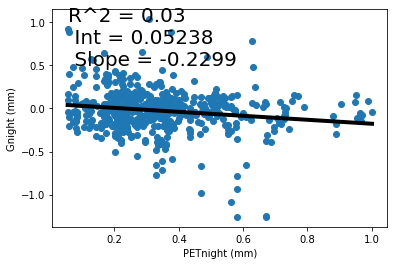

In [27]:
X = LongData.loc[:,'PETnight'].loc['2014-11-08':]
Y = LongData.loc[:,'ResDarkDeltas'].loc['2014-11-08':]
plt.plot(X,Y,'o')

ModTemp = sm.regression.linear_model.OLS(Y,  # Y variable
                                        sm.add_constant(X), # X variable
                                        missing='drop',                                     # ignor and data where one value is missing
                                        hasconst=False) 
Regres = ModTemp.fit(); 
Xs = []
Xs.append(X.min())
Xs.append(X.max())
Ys = []
Ys.append(Regres.params[0] + Xs[0]*Regres.params[1])
Ys.append(Regres.params[0] + Xs[1]*Regres.params[1])
plt.plot(Xs,Ys,'-', linewidth = 4, color='k')
fitR2 = 'R^2 = ' + str(Regres.rsquared)[:4] + '\n Int = ' + str(Regres.params[0])[:7] + '\n Slope = ' + str(Regres.params[1])[:7]
plt.text(X.min(),0.5,fitR2,fontsize=20)
plt.xlabel('PETnight (mm)')
plt.ylabel('Gnight (mm)')

### Thiss give a sensible pattern of fluxes where then are about 1 at the start of the trial and become progressively higher for the Low and more negative for the Full treatments as time progresses

In [28]:
UpwardFlux = DarkWaterDeltas.copy()
UpwardFlux.index = UpwardFlux.index.normalize()
for plot in  UpwardFlux:
    AdjustedFlux = UpwardFlux.loc[:,plot].values
    AdjustedFlux = np.add(AdjustedFlux,NightTimePETAtmospheric.reindex(UpwardFlux.index).values) # Add in the amount of evaporation that would have been replaced
    #AdjustedFlux = np.subtract(AdjustedFlux,NightTimeSoilHeatFlux_mm.loc[UpwardFlux.index,plot].fillna(0))
    UpwardFlux.loc[:,plot] = AdjustedFlux
UpwardFlux = UpwardFlux.multiply(4)  # Multiply by 4 assuming upflux during the day were the same as at night
UpwardFlux.fillna(0, inplace = True)
MeanUpwardFlux = UpwardFlux.groupby(level=['Cultivar','Irrigation'],axis=1).mean()

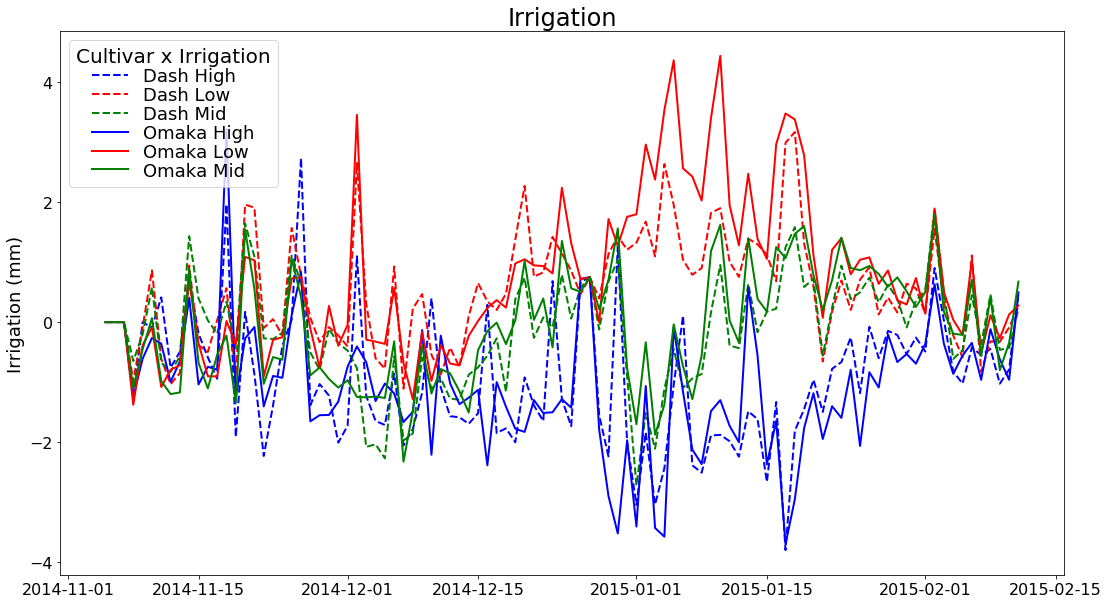

In [29]:
AccumUpFlux = MeanUpwardFlux.cumsum()
Graph = plt.figure(figsize=(18,10))
ax = Graph.add_subplot(1,1,1)
GH.AddIndexedPlot(MeanUpwardFlux,ax,GPs,2)
GH.AddLegend(2,18,"Cultivar x Irrigation")
GH.SetAxProps(title='Irrigation',titsize=24,
              ylab='Irrigation (mm)',labsize = 18,
              ticsize = 16)

# Calculate hourly water use values

## Calculate profile water content deltas for each 1 hour measurement period

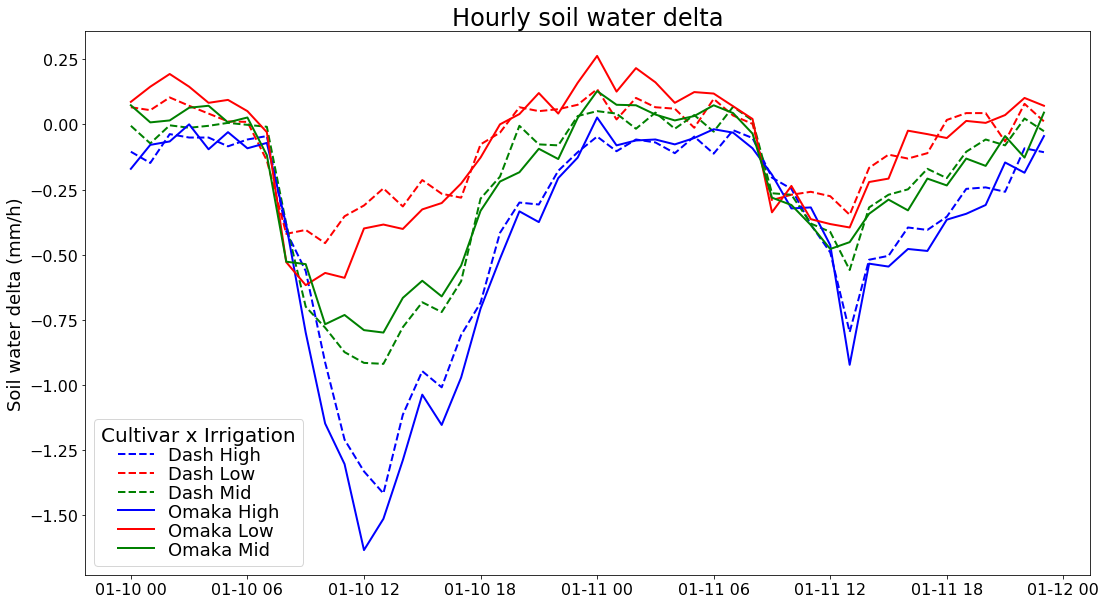

In [30]:
WaterDeltaHourly = WaterDelta.resample('h').sum()
MeanWaterDeltaHourly = WaterDeltaHourly.groupby(level=['Cultivar','Irrigation'],axis=1).mean()
SEMWaterDeltaHourly = WaterDeltaHourly.groupby(level=['Cultivar','Irrigation'],axis=1).std()/np.sqrt(4)
Graph = plt.figure(figsize=(18,10))
ax = Graph.add_subplot(1,1,1)
GH.AddIndexedPlot(MeanWaterDeltaHourly.loc['2015-01-10':'2015-01-11'],ax,GPs,2)
GH.AddLegend(3,18,"Cultivar x Irrigation")
GH.SetAxProps(title='Hourly soil water delta',titsize=24,
              ylab='Soil water delta (mm/h)',labsize = 18,
              ticsize = 16)

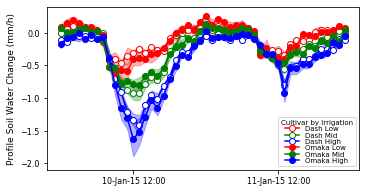

In [31]:
WaterDeltaHourly = WaterDelta.resample('h').sum()
MeanWaterDeltaHourly = WaterDeltaHourly.groupby(level=['Irrigation', 'Cultivar'],axis=1).mean()
SEMWaterDeltaHourly = WaterDeltaHourly.groupby(level=['Irrigation', 'Cultivar'],axis=1).std()/np.sqrt(4)
Start = '2015-01-10'
End = '2015-01-11'
Cultivars = ['Dash','Omaka']
Irrigations = ['Low', 'Mid', 'High']
colors = ['r','b']
cultColors = ['w','w','w','r','g','b']
irrigColors = ['r','g','b','r','g','b']
alphas = [0.2,0.3]
fig, ax = plt.subplots(figsize=(5.6,3))
CulPos = 0
for Cul in Cultivars:
    IrrPos = 0
    for Irr in Irrigations:
        Ind = MeanWaterDeltaHourly.loc[Start:End,(Irr,Cul)].index
        Med = MeanWaterDeltaHourly.loc[Start:End,(Irr,Cul)]
        SEM = SEMWaterDeltaHourly.loc[Start:End,(Irr,Cul)]
        Upp = Med + SEM
        Low = Med - SEM
        plt.fill_between(Ind,Upp,Low,color = irrigColors[IrrPos],alpha=0.3)
        plt.plot(Ind,Med,'o-',mec=irrigColors[IrrPos], mfc = cultColors[CulPos],label = Cul + ' ' + Irr,color=irrigColors[IrrPos])
        IrrPos += 1
        CulPos+=1
        
plt.ylabel('Profile Soil Water Change (mm/h)',fontsize=9)
ax.xaxis.set_major_locator(mdates.HourLocator(12))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%y %H:%M'))
plt.tick_params(labelsize=8)
plt.ylim(-2.1,0.4)

ledg = plt.legend(loc=4,numpoints=1,fontsize = 7,labelspacing = 0.05, 
                          title='Cultivar by Irrigation')
ledg.get_title().set_fontsize(7)
#plt.savefig('Fig_5.jpg',dpi=1000)
#plt.savefig('Fig_5.eps',dpi=1000)
plt.savefig('Fig_5.png',dpi=1000)

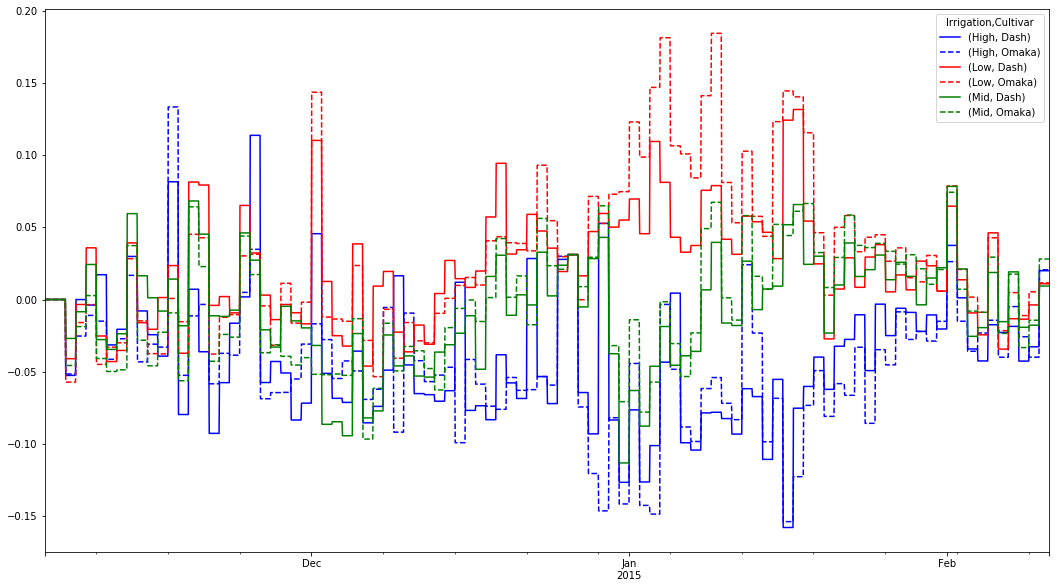

In [32]:
UpwardFluxHourlyArray = np.divide(UpwardFlux.values,24)
UpwardFluxHourly = pd.DataFrame(data = UpwardFluxHourlyArray,index=UpwardFlux.index,columns=UpwardFlux.columns)
UpwardFluxHourly = UpwardFluxHourly.resample('h').bfill()
MeanUpwardFluxHourly = UpwardFluxHourly.groupby(level=['Irrigation', 'Cultivar'],axis=1).mean()
MeanUpwardFluxHourly.plot( figsize=(18,10), style=['b-','b--','r-','r--','g-','g--'])

(-0.5, 0.2)

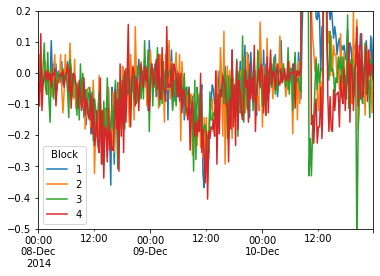

In [33]:
WaterDelta.loc['2014-12-08':'2014-12-10',('Omaka','High')].plot()
plt.ylim(-.5,.2)

(-0.5, 0.2)

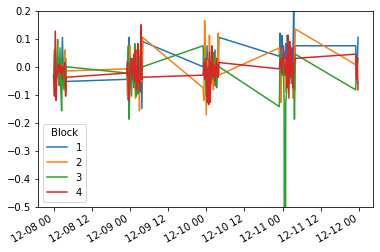

In [34]:
WaterDelta.iloc[WaterDelta.index.indexer_between_time(datetime.time(23),datetime.time(4))].loc['2014-12-08':'2014-12-11',('Omaka','High')].plot()
plt.ylim(-.5,.2)

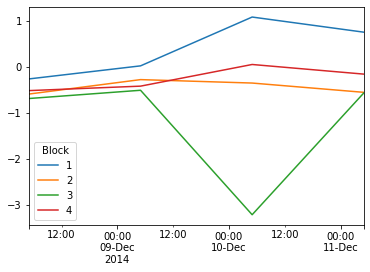

In [35]:
DarkWaterDeltas.loc['2014-12-08':'2014-12-11',('Omaka','High')].plot()
#plt.ylim(-.5,.2)

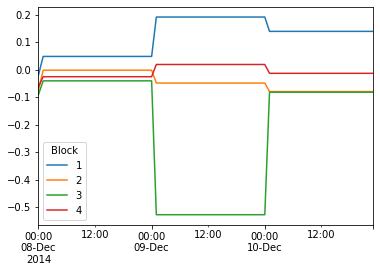

In [36]:
UpwardFluxHourly.loc['2014-12-08':'2014-12-10',('Omaka','High')].plot()

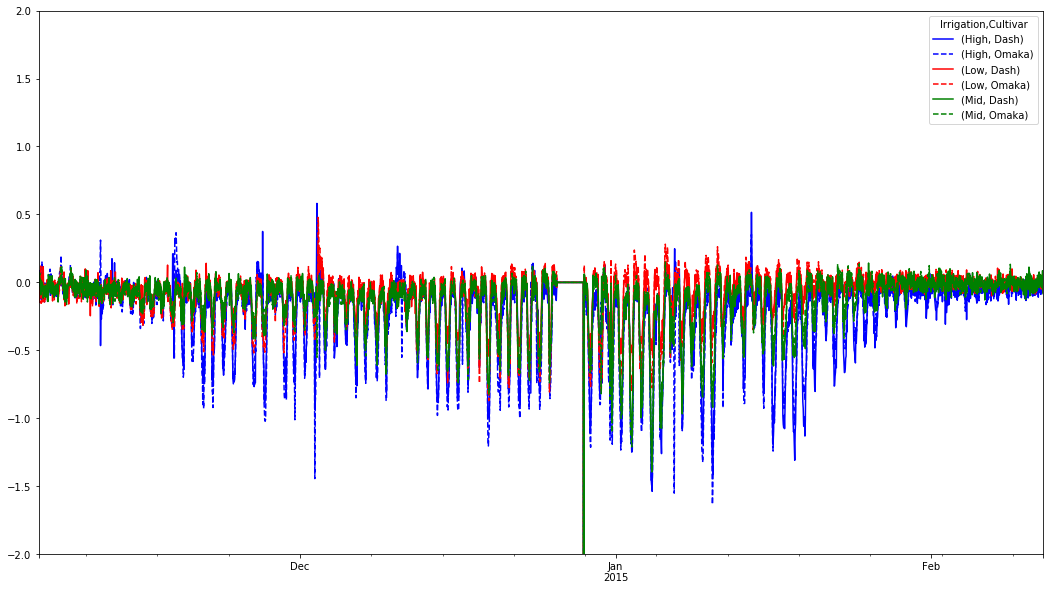

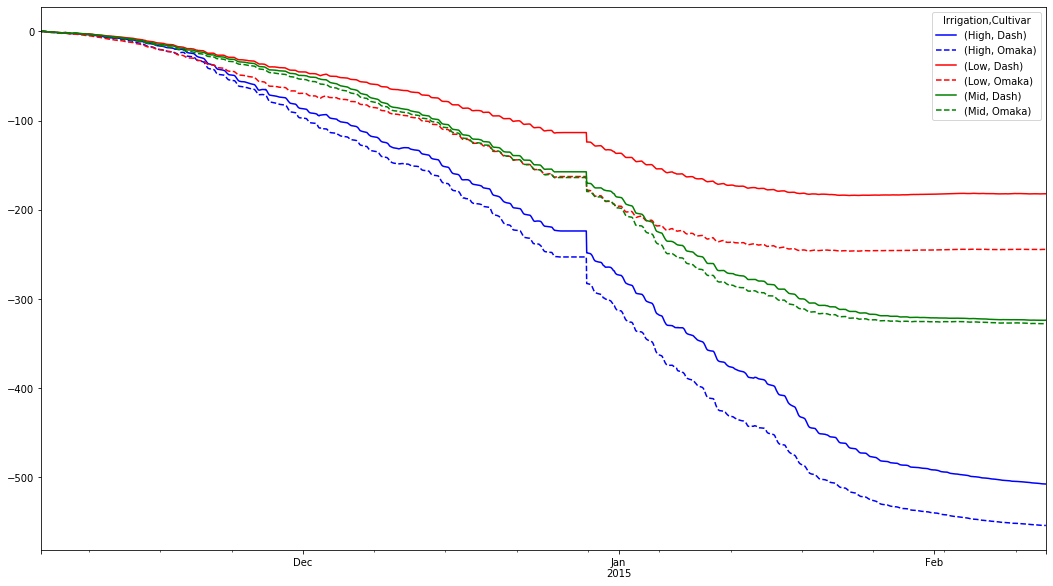

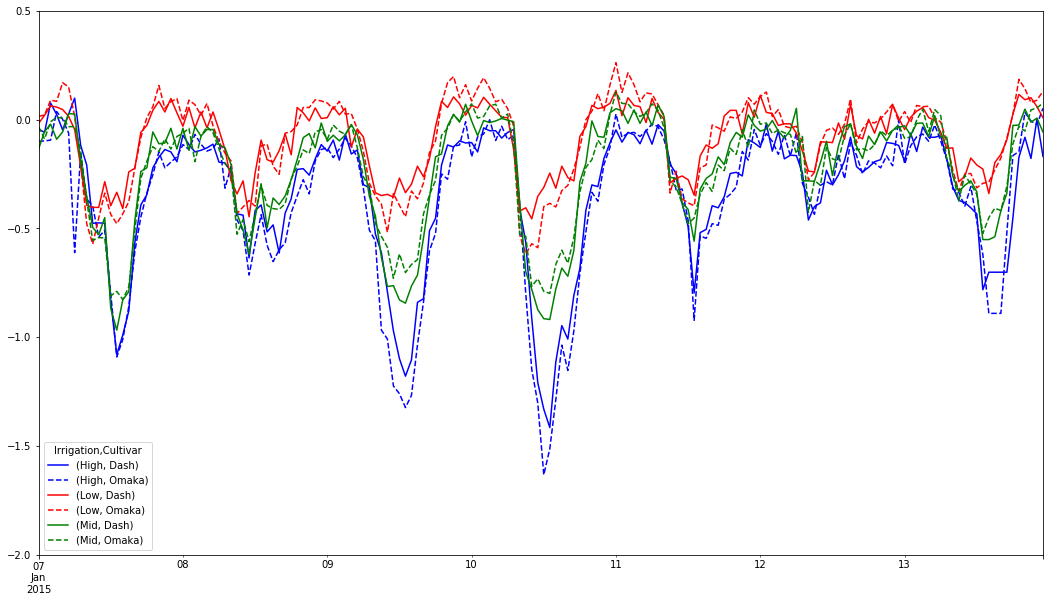

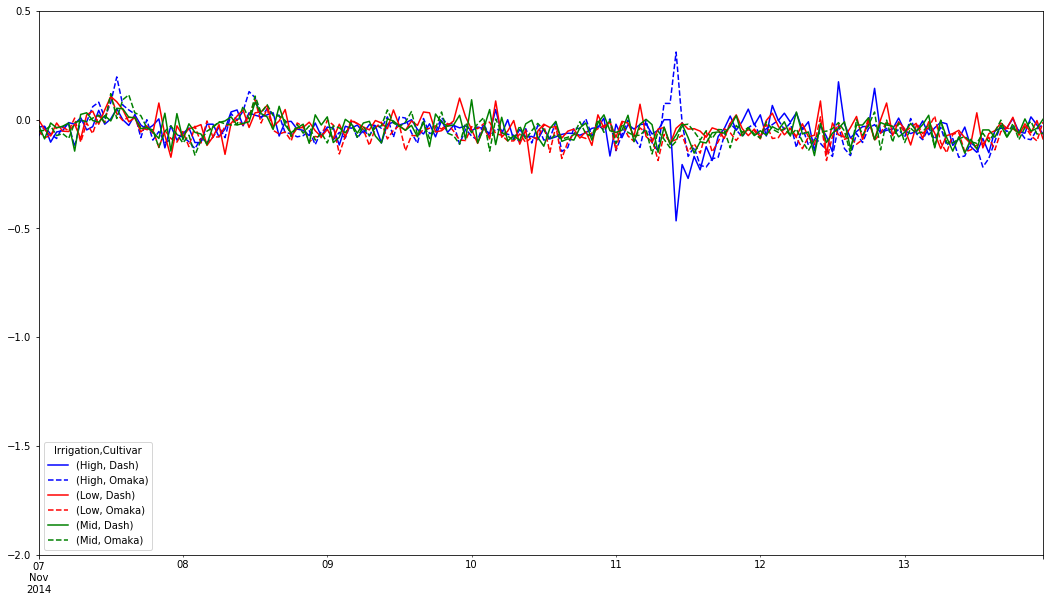

In [37]:
WaterUseHourly = WaterDeltaHourly#.subtract(UpwardFluxHourly)
WaterUseHourly = WaterUseHourly.where(WaterUseHourly<1)
WaterUseHourly.fillna(method='ffill', inplace = True)
MeanWaterUseHourly = WaterUseHourly.groupby(level=['Irrigation', 'Cultivar'],axis=1).mean()
MeanWaterUseHourly.plot(figsize=(18,10),style=['b-','b--','r-','r--','g-','g--'], ylim=(-2,2))
MeanWaterUseHourly.cumsum().plot(figsize=(18,10),style=['b-','b--','r-','r--','g-','g--'])
MeanWaterUseHourly.loc['2015-01-07':'2015-01-13'].plot(figsize=(18,10),style=['b-','b--','r-','r--','g-','g--'], ylim=(-2,0.5))
MeanWaterUseHourly.loc['2014-11-07':'2014-11-13'].plot(figsize=(18,10),style=['b-','b--','r-','r--','g-','g--'], ylim=(-2,0.5))

In [38]:
WaterUseHourly.to_pickle('.\DataFrames\HourlyWUmm.pkl')

In [39]:
WaterUseHourly

Cultivar               Dash                                                \
Irrigation             High                             Low                 
Block                     1       2       3       4       1             2   
2014-11-05 08:00:00  0.0525 -0.0375  0.0375 -0.0825  0.0300  7.500000e-03   
2014-11-05 09:00:00 -0.0075  0.0225  0.0075  0.0825  0.0375 -6.600000e-01   
2014-11-05 10:00:00  0.0300  0.0825 -0.1275  0.0075  0.0900  7.500000e-03   
2014-11-05 11:00:00  0.1050 -0.0075  0.0450 -0.0975 -0.1350  6.000000e-02   
2014-11-05 12:00:00 -0.0450 -0.1500  0.0225 -0.0150  0.0300  6.000000e-02   
...                     ...     ...     ...     ...     ...           ...   
2015-02-11 19:00:00  0.0075 -0.0225  0.0000  0.0300  0.0450  1.650000e-01   
2015-02-11 20:00:00 -0.0225  0.1275 -0.1200 -0.0600  0.1125 -7.500000e-03   
2015-02-11 21:00:00  0.0900 -0.0600 -0.0300 -0.1500  0.0375 -6.000000e-02   
2015-02-11 22:00:00 -0.0150  0.0150  0.0750  0.0975 -0.1725 -2.250000e-02   
2015-02-11 23:00:00  0.0150 -0.0750 -0.0900 -0.1425 -0.1425 -5.684342e-14   

Cultivar                                                         ...   Omaka  \
Irrigation                                          Mid          ...    High   
Block                           3             4       1       2  ...       3   
2014-11-05 08:00:00  0.000000e+00  3.750000e-02 -0.1350  0.0375  ... -0.2775   
2014-11-05 09:00:00  0.000000e+00  3.000000e-02 -0.0750  0.0300  ... -0.1050   
2014-11-05 10:00:00  0.000000e+00  6.000000e-02  0.1650  0.1125  ...  0.0750   
2014-11-05 11:00:00  0.000000e+00  3.000000e-02  0.0225 -0.0075  ...  0.0375   
2014-11-05 12:00:00  0.000000e+00 -7.500000e-03 -0.0075  0.0450  ...  0.0375   
...                           ...           ...     ...     ...  ...     ...   
2015-02-11 19:00:00  0.000000e+00  5.684342e-14  0.0450 -0.0375  ... -0.0300   
2015-02-11 20:00:00  1.200000e-01 -3.000000e-02  0.0375 -0.0300  ... -0.0900   
2015-02-11 21:00:00  5.250000e-02 -1.500000e-02 -0.0525 -0.0600  ... -0.0225   
2015-02-11 22:00:00  1.136868e-13  9.000000e-02  0.1500  0.1050  ... -0.0225   
2015-02-11 23:00:00 -5.250000e-02 -9.000000e-02 -0.1800 -0.0150  ... -0.0900   

Cultivar                                                                   \
Irrigation                      Low                                   Mid   
Block                     4       1       2       3       4             1   
2014-11-05 08:00:00  0.0525  0.0300  0.0075  0.0150  0.1125 -4.500000e-02   
2014-11-05 09:00:00 -0.0675  0.0825 -0.1275 -0.0375  0.1050  1.350000e-01   
2014-11-05 10:00:00  0.1500  0.0825 -0.0150  0.0525  0.0675 -1.500000e-02   
2014-11-05 11:00:00 -0.0450 -0.0300  0.1275 -0.3225 -0.0150  5.250000e-02   
2014-11-05 12:00:00  0.0225 -0.0225  0.0300  0.0150  0.0300 -8.250000e-02   
...                     ...     ...     ...     ...     ...           ...   
2015-02-11 19:00:00 -0.0900 -0.1950  0.0000 -0.0300  0.0300 -1.136868e-13   
2015-02-11 20:00:00  0.0300 -0.0150 -0.0300  0.0000  0.0375  3.000000e-02   
2015-02-11 21:00:00 -0.0150  0.1800  0.0000  0.0075 -0.0150 -7.500000e-02   
2015-02-11 22:00:00  0.0675  0.0000  0.0300  0.0900  0.0900 -1.050000e-01   
2015-02-11 23:00:00 -0.0225 -0.1575 -0.1500  0.0150  0.0300  3.000000e-02   

Cultivar                                           
Irrigation                                         
Block                     2             3       4  
2014-11-05 08:00:00 -0.0075  4.500000e-02  0.0525  
2014-11-05 09:00:00 -0.1650 -7.500000e-02 -0.0300  
2014-11-05 10:00:00 -0.0225  6.750000e-02  0.1950  
2014-11-05 11:00:00  0.0900 -6.000000e-02  0.1800  
2014-11-05 12:00:00 -0.0450 -4.500000e-02  0.1125  
...                     ...           ...     ...  
2015-02-11 19:00:00 -0.0525  1.500000e-02 -0.0900  
2015-02-11 20:00:00  0.0000  3.000000e-02  0.1350  
2015-02-11 21:00:00  0.1050  3.000000e-02 -0.0300  
2015-02-11 22:00:00  0.0000  5.684342e-14  0.0300  
2015-02-11 23:00:00 -0.0150 -8.250000e-02  0.

In [40]:
WaterDelta

Cultivar               Dash                                                  \
Irrigation             High                             Low                   
Block                     1       2       3       4       1       2       3   
2014-11-05 08:00:00     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2014-11-05 08:15:00  0.0000  0.0525 -0.0600 -0.0150  0.0225 -0.0300     NaN   
2014-11-05 08:30:00  0.0525 -0.1125  0.0975 -0.0675  0.0300 -0.1050     NaN   
2014-11-05 08:45:00  0.0000  0.0225  0.0000  0.0000 -0.0225  0.1425     NaN   
2014-11-05 09:00:00 -0.0525 -0.0300  0.0000 -0.0600  0.0150  0.0450     NaN   
...                     ...     ...     ...     ...     ...     ...     ...   
2015-02-11 22:45:00 -0.0150  0.0300  0.0675 -0.0225  0.0675 -0.0300 -0.0075   
2015-02-11 23:00:00  0.0450 -0.0150 -0.0675 -0.0225  0.0000  0.0450 -0.0225   
2015-02-11 23:15:00 -0.0600 -0.1200  0.0675 -0.1500 -0.0075  0.0000  0.0300   
2015-02-11 23:30:00  0.0300  0.0300 -0.0675  0.0600 -0.0975  0.0225 -0.1200   
2015-02-11 23:45:00  0.0000  0.0300 -0.0225 -0.0300 -0.0375 -0.0675  0.0600   

Cultivar                                     ...   Omaka                  \
Irrigation                      Mid          ...    High             Low   
Block                     4       1       2  ...       3       4       1   
2014-11-05 08:00:00     NaN     NaN     NaN  ...     NaN     NaN     NaN   
2014-11-05 08:15:00 -0.0075 -0.0525  0.0225  ... -0.1050 -0.0225  0.0675   
2014-11-05 08:30:00  0.0450 -0.0375  0.0525  ... -0.0150  0.0450 -0.0075   
2014-11-05 08:45:00  0.0000 -0.0450 -0.0375  ... -0.1575  0.0300 -0.0300   
2014-11-05 09:00:00 -0.0300  0.1875 -0.0375  ...  0.0600 -0.0600 -0.0075   
...                     ...     ...     ...  ...     ...     ...     ...   
2015-02-11 22:45:00  0.0000  0.1350  0.0600  ...  0.0000  0.0075  0.0000   
2015-02-11 23:00:00 -0.0600 -0.1650 -0.0450  ...  0.0375 -0.1275 -0.0900   
2015-02-11 23:15:00  0.1200  0.0150  0.0525  ... -0.0375  0.1050 -0.0300   
2015-02-11 23:30:00 -0.1650 -0.1650 -0.0600  ... -0.0750 -0.0150 -0.0600   
2015-02-11 23:45:00  0.0150  0.1350  0.0375  ... -0.0150  0.0150  0.0225   

Cultivar                                                           \
Irrigation                                            Mid           
Block                     2       3       4             1       2   
2014-11-05 08:00:00     NaN     NaN     NaN           NaN     NaN   
2014-11-05 08:15:00  0.0225  0.0750  0.0975 -1.350000e-01 -0.0225   
2014-11-05 08:30:00 -0.0225 -0.0300 -0.0150  9.000000e-02  0.0600   
2014-11-05 08:45:00  0.0075 -0.0300  0.0300  0.000000e+00 -0.0450   
2014-11-05 09:00:00  0.0150  0.1425  0.0225  7.500000e-02  0.0150   
...                     ...     ...     ...           ...     ...   
2015-02-11 22:45:00 -0.0300  0.0600 -0.0300 -7.500000e-02  0.0300   
2015-02-11 23:00:00 -0.0900  0.0150  0.0075  4.500000e-02 -0.0150   
2015-02-11 23:15:00 -0.0150 -0.0300 -0.0075  1.500000e-02  0.0000   
2015-02-11 23:30:00 -0.0300  0.0600 -0.0300 -3.000000e-02  0.0300   
2015-02-11 23:45:00 -0.0150 -0.0300  0.0600 -5.684342e-14 -0.0300   

Cultivar                                         
Irrigation                                       
Block                           3             4  
2014-11-05 08:00:00           NaN           NaN  
2014-11-05 08:15:00 -1.500000e-02  7.500000e-03  
2014-11-05 08:30:00  3.750000e-02  1.500000e-02  
2014-11-05 08:45:00  2.250000e-02  3.000000e-02  
2014-11-05 09:00:00 -7.500000e-02 -3.000000e-02  
...                           ...           ...  
2015-02-11 22:45:00  9.000000e-02  3.000000e-02  
2015-02-11 23:00:00 -3.000000e-02  5.684342e-14  
2015-02-11 23:15:00 -5.684342e-14  9.000000e-02  
2015-02-11 23:30:00 -9.000000e-02 -3.000000e-02  
2015-02-11 23:45:00  3.750000e-02  0.000000e+00  

[9207 rows x 24 columns]

## Calculate Daily Water Use

In [41]:
#Set up daily water use sums
WaterUseDaily = WaterUseHourly.resample('D').sum()
WaterUseDaily.index.name = 'Date'

#Wipe the data on the days when the data logger was full
WaterUseDaily.loc['2014-12-26':'2014-12-28',:] = np.nan

#wipe the data on the days when irrigation occured 
WaterUseDaily.loc[LowIrrIndex,'Low']=np.nan
for date in MidIrrIndex:
    WaterUseDaily.loc[date,'Mid']=np.nan
for date in HighIrrigIndex:
    WaterUseDaily.loc[date,'High']=np.nan


In [42]:
#calculate treatment means
WaterUseDailyMeans = WaterUseDaily.groupby(level=['Irrigation', 'Cultivar'],axis=1).mean()
#Make water use positive
WaterUseDailyMeans = WaterUseDailyMeans.multiply(-1)
#Remove the 28th of December because data was lost from the previous two days meaning these days water use was moved into the 28th
WaterUseDailyMeans.loc['2014-12-25':'2014-12-28'] = np.nan

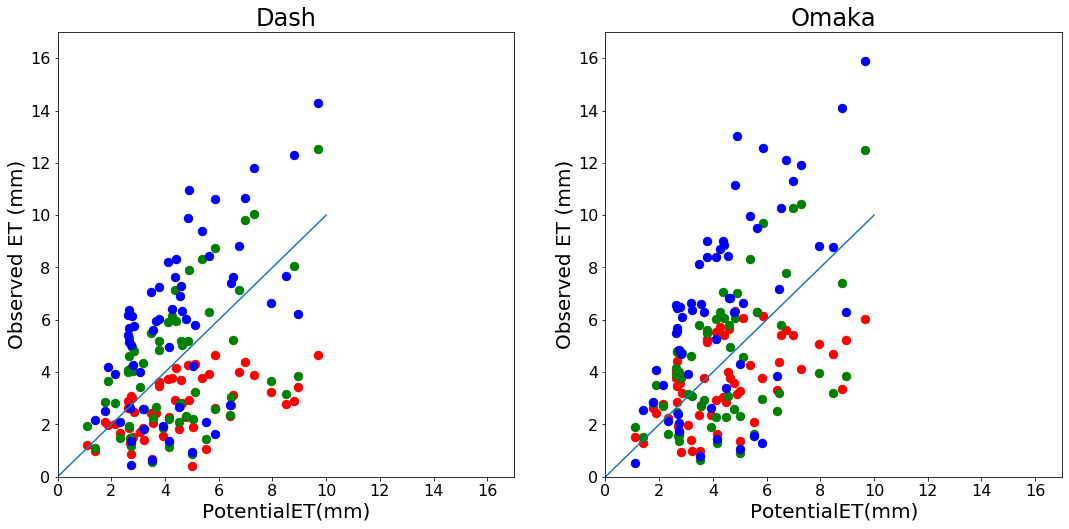

In [43]:
Comparison = plt.figure(figsize = (18,18))

Irrigations = ['Low','Mid','High']
Cultivars = ['Dash','Omaka']
Colors = ['red','green','blue']

Position = 1
for Cul in Cultivars:
    fig = Comparison.add_subplot(2,2,Position)
    ColorPosition = 0   
    for Irr in Irrigations:
        yData = WaterUseDailyMeans.loc['2014-11-08':'2015-01-10',(Irr,Cul)]
        plt.scatter(DayTimePET.loc['2014-11-08':'2015-01-10'],
                    yData, 
                    color = Colors[ColorPosition],
                    label = Irr,
                    s = 70)
        ColorPosition += 1
    plt.plot([0,10],[0,10],'-')
    plt.ylabel('Observed ET (mm)', fontsize= 20)
    plt.xlabel('PotentialET(mm)', fontsize= 20)
    plt.tick_params(labelsize = 16)
    plt.ylim(0,17)
    plt.xlim(0,17)
    #plt.legend(loc=1,fontsize = 24)
    plt.title(Cul, fontsize = 24)
    Position +=1

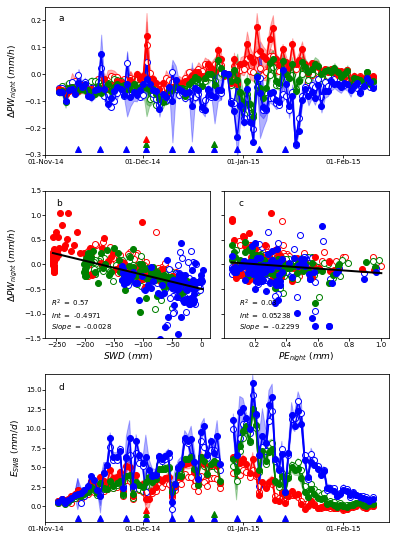

In [44]:
Graph = plt.figure(figsize=(5.6,10))

#Dark Water Delta graph
Cultivars = ['Dash','Omaka']
Irrigations = ['Low', 'Mid', 'High']
colors = ['r','b']
cultColors = ['w','w','w','r','g','b']
irrigColors = ['r','g','b','r','g','b']
alphas = [0.2,0.3]
fig = plt.subplot2grid((4,2),(0,0),colspan=2)
CulPos = 0
for Cul in Cultivars:
    IrrPos = 0
    for Irr in Irrigations:
        Ind = DarkWaterDeltas.loc[:'2015-02-10',(Cul,Irr)].index
        Med = DarkWaterDeltas.loc[:'2015-02-10',(Cul,Irr)].mean(axis=1)/6
        SEM = DarkWaterDeltas.loc[:'2015-02-10',(Cul,Irr)].std(axis=1)/np.sqrt(4)/6
        Upp = Med + SEM
        Low = Med - SEM
        plt.fill_between(Ind,Upp,Low,color = irrigColors[IrrPos],alpha=0.3)
        plt.plot(Ind,Med,'o-',mec=irrigColors[IrrPos], mfc = cultColors[CulPos],label = Cul + ' ' + Irr,color=irrigColors[IrrPos])
        IrrPos += 1
        CulPos+=1
plt.ylim(-.3,.25)
plt.plot(HighIrrigIndex,list(-0.28 for x in range(len(HighIrrigIndex))),'^',c='b')
plt.plot(MidIrrIndex,[-0.26,-0.26],'^',c='g')
plt.plot(LowIrrIndex,[-0.24],'^',c='r')
plt.xlim(datetime.date(2014,11,1),datetime.date(2015,2,15))
plt.ylabel('$\Delta PW_{night}$ $(mm/h)$', fontsize=9)
fig.xaxis.set_major_locator(mdates.MonthLocator())
fig.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%y'))
plt.tick_params(axis='x', which='both', bottom=True,top=False, labelbottom=True,labelsize=7,length = 3, direction = 'out', pad = 1)
plt.tick_params(axis='y', which='both', left=True,right=False, labelright=False,labelsize=7, length = 3, direction = 'out', pad = 1)
plt.text(datetime.date(2014,11,5),0.2,'a',fontsize=9)

##Dark water delta vs SWD graph
#fig = Graph.add_subplot(4,2,3)
fig = plt.subplot2grid((4,2),(1,0))
ecols = ['r','g','b','r','g','b']
fcols = ['w','w','w','r','g','b']
DailyDescriptor = LongData.loc[:,'SWD']
pos = 0
for cul in Cultivars:
    for irr in Irrigations:
        fig.plot(LongData.loc[(cul,irr),'SWD'].loc['2014-11-08':],
            LongData.loc[(cul,irr),'DarkDeltas'].loc['2014-11-08':],
                 'o',mec=ecols[pos],mfc=fcols[pos])
        pos+=1  

X = LongData.loc[:,'SWD']
Y = LongData.loc[:,'DarkDeltas']
ModTemp = sm.regression.linear_model.OLS(Y,  # Y variable
                                        sm.add_constant(X), # X variable
                                        missing='drop',                                     # ignor and data where one value is missing
                                        hasconst=False) 
Regres = ModTemp.fit(); 
Xs = []
Xs.append(X.min())
Xs.append(X.max())
Ys = []
Ys.append(Regres.params[0] + Xs[0]*Regres.params[1])
Ys.append(Regres.params[0] + Xs[1]*Regres.params[1])
fig.plot(Xs,Ys,'-', linewidth = 2, color='k')
fitR2 = r'$R^2\ =\ $' + str(Regres.rsquared)[:4] + '\n$Int\ =\ $' + str(Regres.params[0])[:7] + '\n$Slope\ =\ $' + str(Regres.params[1])[:7] 
fig.text(-260,-1.3,fitR2,fontsize=7)
fig.set_ylim(-1.5,1.5)
#fig.set_title(des, fontsize = 20)
plt.ylabel('$\Delta PW_{night}$ $(mm/h)$', fontsize=9)
plt.xlabel('$SWD$ $(mm)$', fontsize=9, weight='bold')
plt.text(-250,1.2,'b',fontsize=9)
plt.tick_params(axis='x', which='both', bottom=True,top=False, labelbottom=True,labelsize=7,length = 3, direction = 'out', pad = 1)
plt.tick_params(axis='y', which='both', left=True,right=False, labelright=False,labelsize=7, length = 3, direction = 'out', pad = 1)
fig.xaxis.labelpad = 2

##Dark water delta residues vs dark PET graph
#fig = Graph.add_subplot(4,2,4)
fig = plt.subplot2grid((4,2),(1,1))
ecols = ['r','g','b','r','g','b']
fcols = ['w','w','w','r','g','b']
pos = 0
for cul in Cultivars:
    for irr in Irrigations:
        fig.plot(LongData.loc[(cul,irr),'PETnight'].loc['2014-11-08':],
            LongData.loc[(cul,irr),'ResDarkDeltas'].loc['2014-11-08':],
                 'o',mec=ecols[pos],mfc=fcols[pos])
        pos+=1  

X = LongData.loc[:,'PETnight']
Y = LongData.loc[:,'ResDarkDeltas']
ModTemp = sm.regression.linear_model.OLS(Y,  # Y variable
                                        sm.add_constant(X), # X variable
                                        missing='drop',                                     # ignor and data where one value is missing
                                        hasconst=False) 
Regres = ModTemp.fit(); 
Xs = []
Xs.append(X.min())
Xs.append(X.max())
Ys = []
Ys.append(Regres.params[0] + Xs[0]*Regres.params[1])
Ys.append(Regres.params[0] + Xs[1]*Regres.params[1])
fig.plot(Xs,Ys,'-', linewidth = 2, color='k')
fitR2 = r'$R^2\ =\ $' + str(Regres.rsquared)[:4] + '\n$Int\ =\ $' + str(Regres.params[0])[:7] + '\n$Slope\ =\ $' + str(Regres.params[1])[:7] 
fig.text(0.1,-1.3,fitR2,fontsize=7)
fig.set_ylim(-1.5,1.5)
#fig.set_title(des, fontsize = 20)
#plt.ylabel('$\Delta PW_{night}$ $(mm/h)$', fontsize=7, weight='bold')
plt.xlabel('$PE_{night}$ $(mm)$', fontsize=9, weight='bold')
plt.text(.1,1.2,'c',fontsize=9)
plt.tick_params(axis='x', which='both', bottom=True,top=False, labelbottom=True,labelsize=7,length = 3, direction = 'out', pad = 1)
plt.tick_params(axis='y', which='both', left=True,right=False, labelleft=False, labelright=False,labelsize=7, length = 3, direction = 'out', pad = 1)
fig.xaxis.labelpad = 2

#Latent heat flux Plot
fig = plt.subplot2grid((4,2),(2,0),colspan=2)
CulPos = 0
for Cul in Cultivars:
    IrrPos = 0
    for Irr in Irrigations:
        Ind = WaterUseDaily.loc[:'2015-02-10',(Cul,Irr)].index
        Med = WaterUseDaily.loc[:'2015-02-10',(Cul,Irr)].mean(axis=1)*-1
        SEM = WaterUseDaily.loc[:'2015-02-10',(Cul,Irr)].std(axis=1)/np.sqrt(4)
        Upp = Med + SEM
        Low = Med - SEM
        plt.fill_between(Ind,Upp,Low,color = irrigColors[IrrPos],alpha=0.3)
        plt.plot(Ind,Med,'o-',mec=irrigColors[IrrPos], mfc = cultColors[CulPos],label = Cul + ' ' + Irr,color=irrigColors[IrrPos])
        IrrPos += 1
        CulPos+=1
plt.ylim(-2,17)
plt.plot(HighIrrigIndex,list(-1.5 for x in range(len(HighIrrigIndex))),'^',c='b')
plt.plot(MidIrrIndex,[-1,-1],'^',c='g')
plt.plot(LowIrrIndex,[-0.5],'^',c='r')
plt.xlim(datetime.date(2014,11,1),datetime.date(2015,2,15))
plt.ylabel('$E_{SWB}$ $(mm/d)$', fontsize=9, weight='bold')
fig.xaxis.set_major_locator(mdates.MonthLocator())
fig.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%y'))
plt.text(datetime.date(2014,11,5),15,'d',fontsize=9)
plt.tick_params(axis='x', which='both', bottom=True,top=False, labelbottom=True,labelsize=7,length = 3, direction = 'out', pad = 1)
plt.tick_params(axis='y', which='both', left=True,right=False, labelright=False,labelsize=7, length = 3, direction = 'out', pad = 1)
plt.tight_layout()

#Graph.savefig('Fig_5.jpg',dpi=1000)
#Graph.savefig('Fig_5.eps',dpi=1000)

(-2, 1)

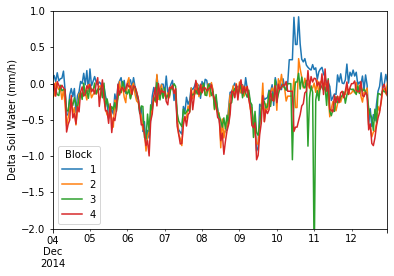

In [45]:
WaterUseHourly.loc['2014-12-04':'2014-12-12',('Omaka','High')].plot()
plt.ylabel('Delta Soil Water (mm/h)')
plt.ylim(-2,1)

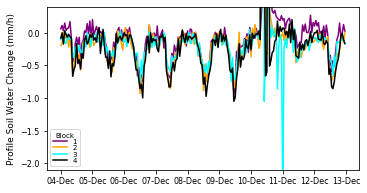

In [46]:
data = WaterDeltaHourly.loc['2014-12-04':'2014-12-12',('Omaka','High')]
BlockColors = ['purple','orange','cyan','k']
fig, ax = plt.subplots(figsize=(5.6,3))
BlockPos = 0
for b in data.columns:
    Ind = data.loc[:,b].index
    Med = data.loc[:,b]
    plt.plot(Ind,Med,'-',color = BlockColors[BlockPos],label = b)
    BlockPos+=1

plt.ylabel('Profile Soil Water Change (mm/h)',fontsize=9)
ax.xaxis.set_major_locator(mdates.HourLocator(0))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
plt.tick_params(labelsize=8)
plt.ylim(-2.1,0.4)

ledg = plt.legend(loc=3,numpoints=1,fontsize = 7,labelspacing = 0.05, 
                          title='Block')
ledg.get_title().set_fontsize(7)
#plt.savefig('Fig_6.jpg',dpi=1000)
#plt.savefig('Fig_6.eps',dpi=1000)
plt.savefig('Fig_6.png', dpi=1000)